## Practica #4

#### Introducción a la ciencia de datos

##### Alumna: Cielo Aholiva Higuera Gutiérrez

##### La cuarta práctica consiste en realizar una tarea de clasificación para predecir los estados de los vuelos con datos históricos reales. El dataset provisto deberá ser analizado respecto a los siguientes requerimientos:

###### •	Limpieza de datos.
###### •	Análisis exploratorio de los datos.
###### •	Procesamiento de datos.
###### •	Extracción y selección de características.
###### •	Reducción de dimensionalidad.
###### •	Evaluación 'interna' con al menos 10 algoritmos de inferencia.
###### •	Reportar los resultados con las siguientes métricas: (i) F1-score macro, (ii) sensibilidad, y (iii) especificidad; además de mostrar las respectivas matrices de confusión. ales.


##### Dado que el tema central de la unidad es la clasificación automática, se deberán evaluar exhaustivamente los siguientes algoritmos shallow (no utilizar algoritmos basados en aprendizaje profundo):

###### •	Aprendizaje basado en árboles de decisión (e.g. C4.5)
###### •	Aprendizaje Bayesiano (e.g. Naive Bayes)
###### •	Aprendizaje basado en instancias (e.g. kNN)
###### •	Máquinas de soporte vectorial (SVM)
###### •	Seis algoritmos de inferencia adicionales.

###### FL_DATE: Fecha del vuelo
###### OP_CARRIER: Identificador de la aerolínea
###### OP_CARRIER_FL_NUM: Número de vuelo
###### ORIGIN: Código del aeropuerto de origen
###### DEST: Código del aeropuerto de destino
###### CRS_DEP_TIME: Hora planeada de salida
###### DEP_TIME: Hora actual de salida
###### DEP_DELAY: Retraso en la salida en minutos
###### TAXI_OUT: El tiempo transcurrido entre la salida desde el aeropuerto de origen y el atributo "WHEELS_OFF"
###### WHEELS_OFF: Hora a la que las llantas del avión dejaron de tocar el suelo
###### CRS_ARR_TIME: Hora planeada de llegada
###### ARR_DELAY: Retraso total en la llegada en minutos (atributo a predecir)
###### CRS_ELAPSED_TIME: Tiempo total planeado del vuelo
###### DISTANCE: Distancia entre los dos aeropuertos

##### Importar librerias

In [1]:
!pip install umap-learn --quiet

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.manifold import TSNE
import umap

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### ***Análisis de datos***

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Practice 4/train_airlines_delay_challenge.csv")

In [5]:
df.head(5)

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE
0,2009-09-05,AA,2062,MIA,BOS,1055.0,1139.0,44.0,15.0,1154.0,1405.0,30.0,190.0,1258.0
1,2009-05-08,XE,2926,IAH,ELP,2115.0,2112.0,-3.0,17.0,2129.0,2219.0,-15.0,124.0,667.0
2,2009-03-16,OH,6433,CVG,DSM,1430.0,1425.0,-5.0,25.0,1450.0,1518.0,7.0,108.0,505.0
3,2009-03-04,OO,5439,LAX,SBA,820.0,814.0,-6.0,15.0,829.0,905.0,-11.0,45.0,89.0
4,2009-06-12,WN,615,LAS,MCI,1235.0,1234.0,-1.0,13.0,1247.0,1735.0,-26.0,180.0,1140.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000000 entries, 0 to 8999999
Data columns (total 14 columns):
 #   Column             Dtype  
---  ------             -----  
 0   FL_DATE            object 
 1   OP_CARRIER         object 
 2   OP_CARRIER_FL_NUM  int64  
 3   ORIGIN             object 
 4   DEST               object 
 5   CRS_DEP_TIME       float64
 6   DEP_TIME           float64
 7   DEP_DELAY          float64
 8   TAXI_OUT           float64
 9   WHEELS_OFF         float64
 10  CRS_ARR_TIME       float64
 11  ARR_DELAY          float64
 12  CRS_ELAPSED_TIME   float64
 13  DISTANCE           float64
dtypes: float64(9), int64(1), object(4)
memory usage: 961.3+ MB


In [7]:
df.shape
df.count()

,0
FL_DATE,9000000
OP_CARRIER,9000000
OP_CARRIER_FL_NUM,9000000
ORIGIN,9000000
DEST,9000000
CRS_DEP_TIME,9000000
DEP_TIME,9000000
DEP_DELAY,9000000
TAXI_OUT,9000000
WHEELS_OFF,9000000


In [8]:
df.describe()

,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE
count,9.000000e+06,9.000000e+06,9.000000e+06,9.000000e+06,9.000000e+06,9.000000e+06,9.000000e+06,9.000000e+06,9.000000e+06,9.000000e+06
mean,2.245577e+03,1.326138e+03,1.332794e+03,8.889274e+00,1.581331e+01,1.355605e+03,1.495601e+03,4.658041e+00,1.368754e+02,7.889871e+02
std,1.877307e+03,4.730146e+02,4.856179e+02,3.604610e+01,9.185871e+00,4.869539e+02,4.932537e+02,3.852880e+01,7.355825e+01,5.947835e+02
min,1.000000e+00,1.000000e+00,1.000000e+00,-2.340000e+02,1.000000e+00,1.000000e+00,1.000000e+00,-2.380000e+02,1.800000e+01,3.100000e+01
25%,6.970000e+02,9.230000e+02,9.250000e+02,-5.000000e+00,1.000000e+01,9.390000e+02,1.115000e+03,-1.300000e+01,8.400000e+01,3.540000e+02
50%,1.684000e+03,1.320000e+03,1.327000e+03,-2.000000e+00,1.400000e+01,1.340000e+03,1.520000e+03,-4.000000e+00,1.180000e+02,6.220000e+02
75%,3.467000e+03,1.725000e+03,1.733000e+03,7.000000e+00,1.800000e+01,1.747000e+03,1.911000e+03,8.000000e+00,1.680000e+02,1.020000e+03
max,9.320000e+03,2.359000e+03,2.400000e+03,1.805000e+03,2.970000e+02,2.400000e+03,2.400000e+03,1.795000e+03,7.180000e+02,4.983000e+03


***Limpieza de datos***

In [5]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
8999995,False
8999996,False
8999997,False
8999998,False


In [5]:
# Contar cuántos renglones hay antes de eliminar duplicados
initial_count = df.shape[0]
# Quitar renglones duplicados
df2 = df.drop_duplicates()
final_count = df2.shape[0]
# Calcular cuántos se eliminaron
duplicates_removed = initial_count - final_count
print(f"Número de renglones duplicados eliminados: {duplicates_removed}")

Número de renglones duplicados eliminados: 27522


In [11]:
# Categorical columns
cat_col = [col for col in df2.columns if df2[col].dtype == 'object']
print('Categorical columns :', cat_col)
# Numerical columns
num_col = [col for col in df2.columns if df2[col].dtype != 'object']
print('Numerical columns :' ,num_col)

Categorical columns : ['FL_DATE', 'OP_CARRIER', 'ORIGIN', 'DEST']
Numerical columns : ['OP_CARRIER_FL_NUM', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'CRS_ARR_TIME', 'ARR_DELAY', 'CRS_ELAPSED_TIME', 'DISTANCE']


In [12]:
df2.isna().sum() / len(df2)

,0
FL_DATE,0.0
OP_CARRIER,0.0
OP_CARRIER_FL_NUM,0.0
ORIGIN,0.0
DEST,0.0
CRS_DEP_TIME,0.0
DEP_TIME,0.0
DEP_DELAY,0.0
TAXI_OUT,0.0
WHEELS_OFF,0.0


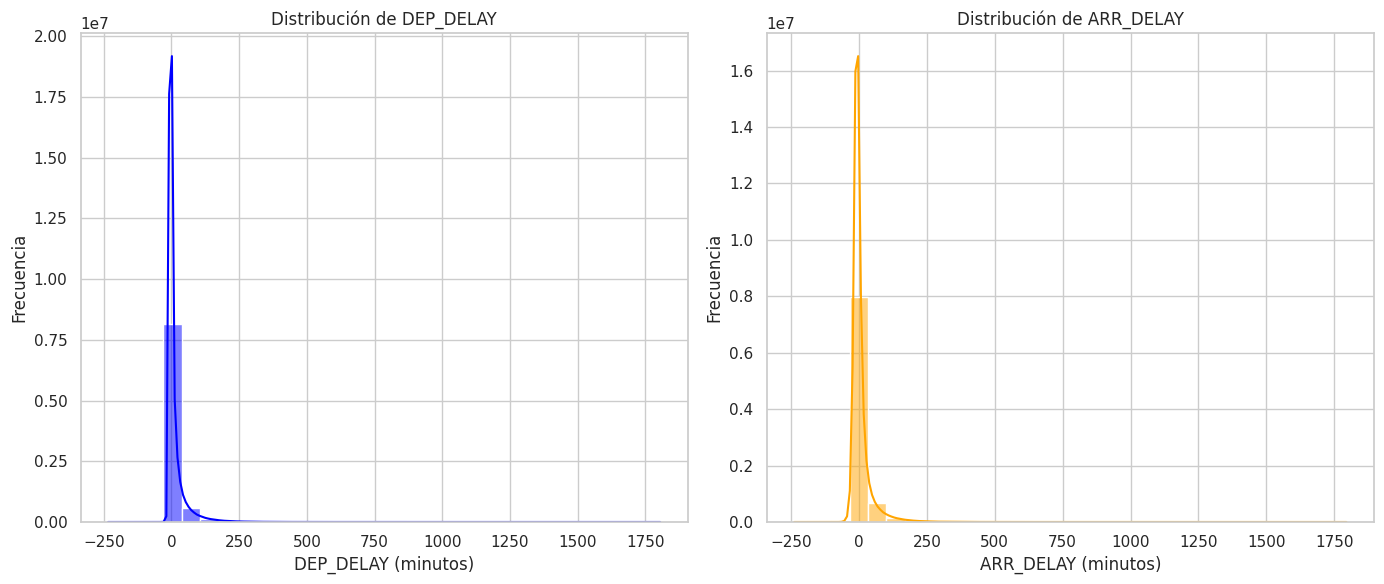

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Histograma de DEP_DELAY
sns.histplot(df2['DEP_DELAY'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribución de DEP_DELAY')
axes[0].set_xlabel('DEP_DELAY (minutos)')
axes[0].set_ylabel('Frecuencia')

# Histograma de ARR_DELAY
sns.histplot(df2['ARR_DELAY'], bins=30, kde=True, ax=axes[1], color='orange')
axes[1].set_title('Distribución de ARR_DELAY')
axes[1].set_xlabel('ARR_DELAY (minutos)')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

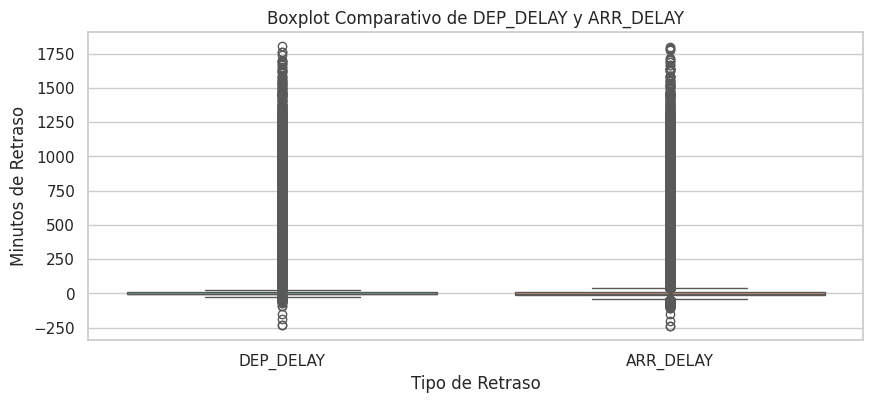

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df2[['DEP_DELAY', 'ARR_DELAY']], palette='Set2')
plt.title('Boxplot Comparativo de DEP_DELAY y ARR_DELAY')
plt.xlabel('Tipo de Retraso')
plt.ylabel('Minutos de Retraso')
plt.show()

In [6]:
# DEP_DELAY
Q1 = df2['DEP_DELAY'].quantile(0.25)
Q3 = df2['DEP_DELAY'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df2[(df2['DEP_DELAY'] < lower_bound) | (df2['DEP_DELAY'] > upper_bound)]
print("Número de outliers de Dep_Delay:", outliers.shape[0])
# ARR_DELAY
Q1 = df2['ARR_DELAY'].quantile(0.25)
Q3 = df2['ARR_DELAY'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df2[(df2['ARR_DELAY'] < lower_bound) | (df2['ARR_DELAY'] > upper_bound)]
print("Número de outliers de Arr_Delay:", outliers.shape[0])

Número de outliers de Dep_Delay: 1119029
Número de outliers de Arr_Delay: 798970


In [7]:
df3 = df2[(df2['DEP_DELAY'] >= lower_bound) & (df2['DEP_DELAY'] <= upper_bound)]
print("Número de datos después de eliminar outliers:", df3.shape[0])

df3 = df2[(df2['ARR_DELAY'] >= lower_bound) & (df2['ARR_DELAY'] <= upper_bound)]
print("Número de datos después de eliminar outliers:", df3.shape[0])

Número de datos después de eliminar outliers: 8200510
Número de datos después de eliminar outliers: 8173508


In [8]:
df3.count()

,0
FL_DATE,8173508
OP_CARRIER,8173508
OP_CARRIER_FL_NUM,8173508
ORIGIN,8173508
DEST,8173508
CRS_DEP_TIME,8173508
DEP_TIME,8173508
DEP_DELAY,8173508
TAXI_OUT,8173508
WHEELS_OFF,8173508


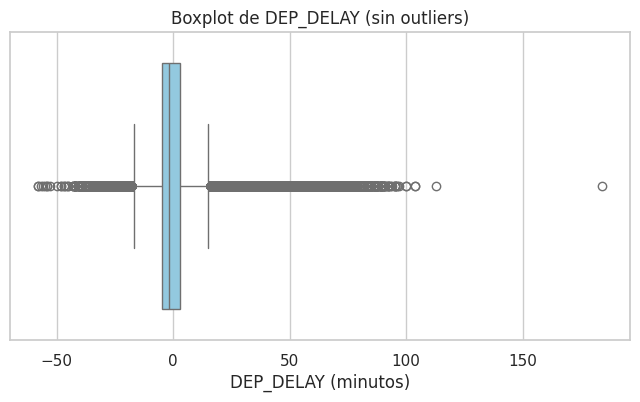

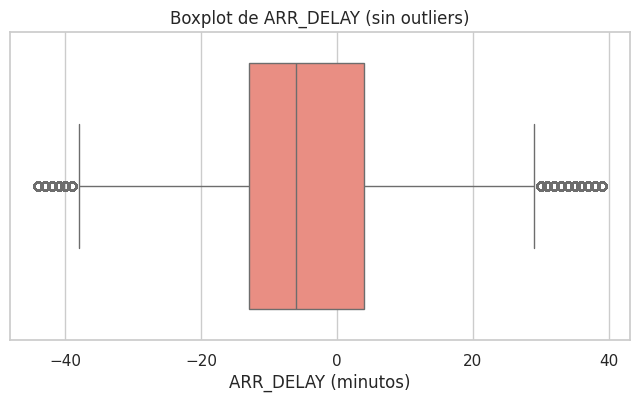

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df3['DEP_DELAY'], color='skyblue')
plt.title('Boxplot de DEP_DELAY (sin outliers)')
plt.xlabel('DEP_DELAY (minutos)')
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x=df3['ARR_DELAY'], color='salmon')
plt.title('Boxplot de ARR_DELAY (sin outliers)')
plt.xlabel('ARR_DELAY (minutos)')
plt.show()

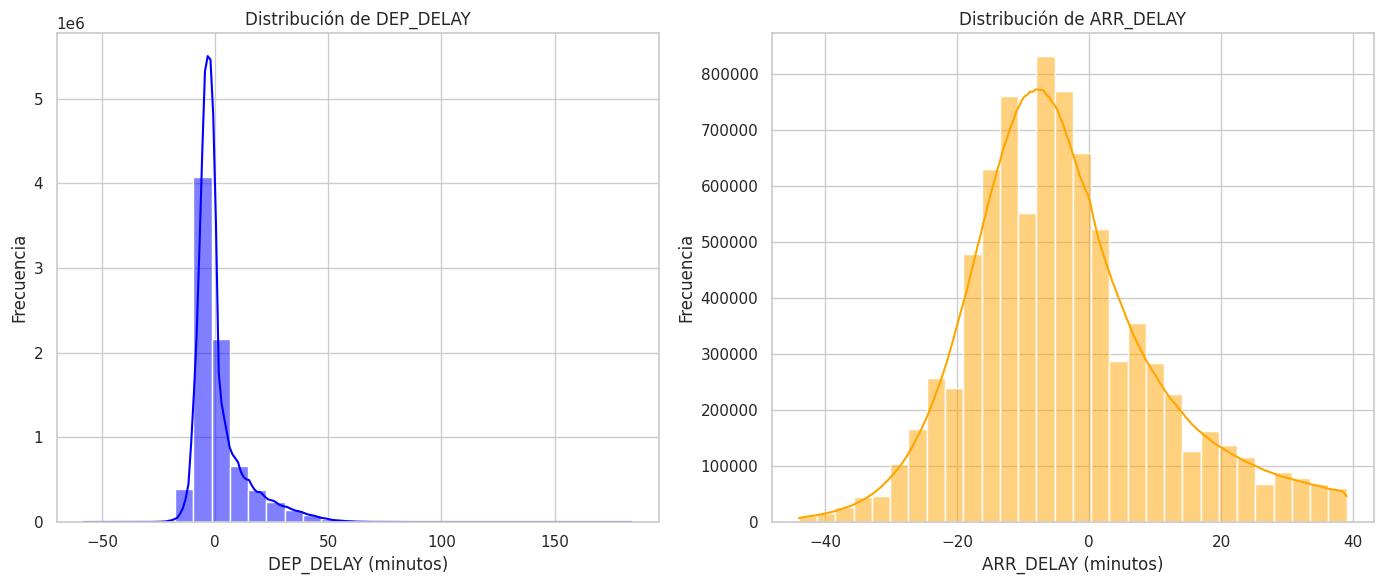

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Histograma de DEP_DELAY
sns.histplot(df3['DEP_DELAY'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribución de DEP_DELAY')
axes[0].set_xlabel('DEP_DELAY (minutos)')
axes[0].set_ylabel('Frecuencia')

# Histograma de ARR_DELAY
sns.histplot(df3['ARR_DELAY'], bins=30, kde=True, ax=axes[1], color='orange')
axes[1].set_title('Distribución de ARR_DELAY')
axes[1].set_xlabel('ARR_DELAY (minutos)')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

***Análisis exploratorio de los datos***

<ipython-input-66-48f092458d0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['FL_DATE'] = pd.to_datetime(df3['FL_DATE'])
<ipython-input-66-48f092458d0b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['YearMonth'] = df3['FL_DATE'].dt.to_period('M')


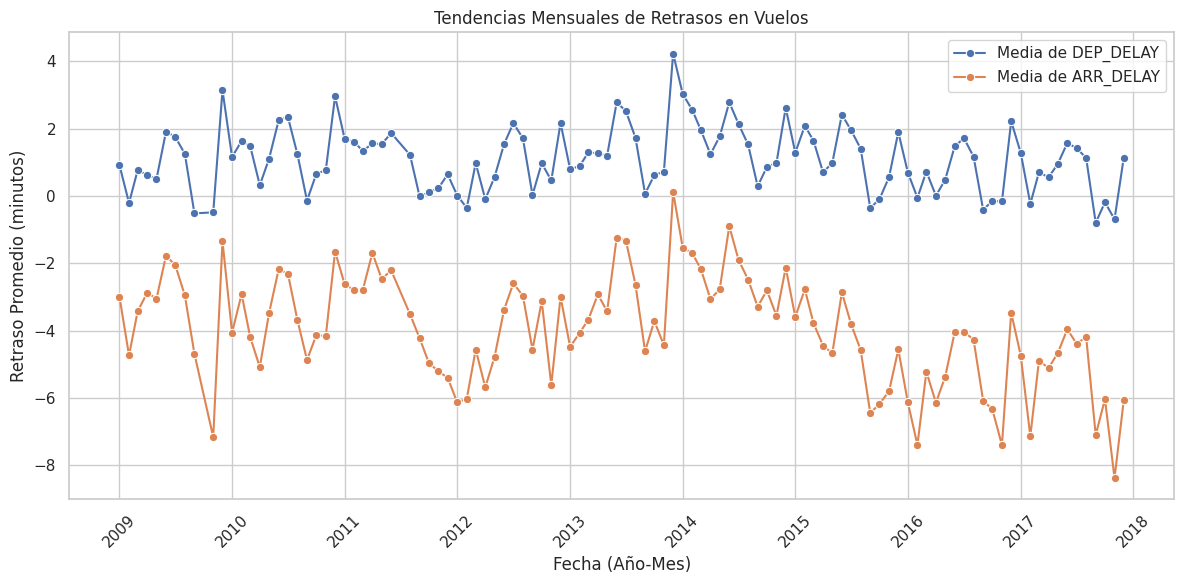

In [ ]:
df3['FL_DATE'] = pd.to_datetime(df3['FL_DATE'])
df3['YearMonth'] = df3['FL_DATE'].dt.to_period('M')
mean_delays = df3.groupby('YearMonth')[['DEP_DELAY', 'ARR_DELAY']].mean().reset_index()

mean_delays['YearMonth'] = mean_delays['YearMonth'].dt.to_timestamp()
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_delays, x='YearMonth', y='DEP_DELAY', label='Media de DEP_DELAY', marker='o')
sns.lineplot(data=mean_delays, x='YearMonth', y='ARR_DELAY', label='Media de ARR_DELAY', marker='o')

plt.title('Tendencias Mensuales de Retrasos en Vuelos')
plt.xlabel('Fecha (Año-Mes)')
plt.ylabel('Retraso Promedio (minutos)')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

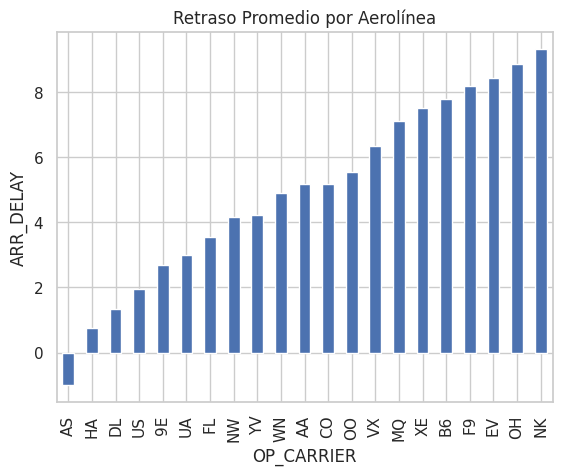

In [ ]:
carrier_delay = df.groupby('OP_CARRIER')['ARR_DELAY'].mean()
carrier_delay.sort_values().plot(kind='bar', title='Retraso Promedio por Aerolínea')
plt.ylabel('ARR_DELAY')
plt.show()

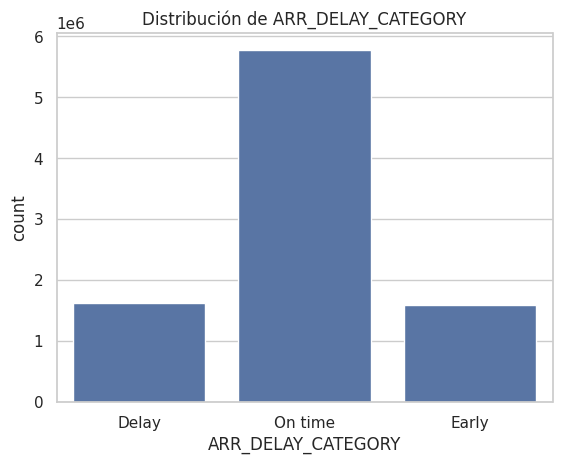

In [ ]:
df['ARR_DELAY_CATEGORY'] = df['ARR_DELAY'].apply(categorize_arr_delay)
sns.countplot(x='ARR_DELAY_CATEGORY', data=df)
plt.title('Distribución de ARR_DELAY_CATEGORY')
plt.show()

Se llevó a cabo un análisis exploratorio de los datos, en el cual se extrajeron diversas características relevantes. En la gráfica titulada "Tendencias Mensuales de Retrasos por Vuelos", se observó que en el año 2014 se registraron los retrasos más significativos.

Además, en la gráfica "Retraso por Aerolínea", se destaca que la aerolínea "NK" presenta la mayor cantidad de retrasos, mientras que la aerolínea "AS" muestra una tendencia a operar con tiempos más anticipados.

Finalmente, la gráfica de barras "Distribución de Arr_Delay_Category" revela que la mayoría de los vuelos llegan a tiempo.

> **Selección de características**

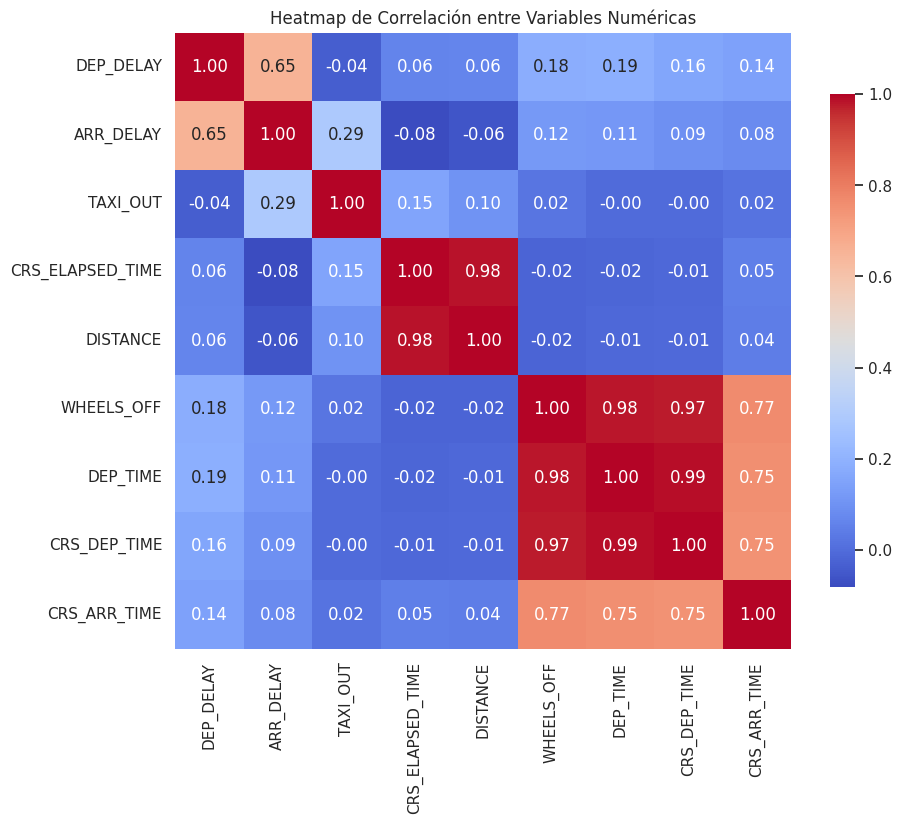

In [ ]:
numeric_vars = df3[['DEP_DELAY', 'ARR_DELAY', 'TAXI_OUT', 'CRS_ELAPSED_TIME', 'DISTANCE', 'WHEELS_OFF', 'DEP_TIME', 'CRS_DEP_TIME', 'CRS_ARR_TIME']]
corr_matrix = numeric_vars.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Heatmap de Correlación entre Variables Numéricas')
plt.show()

<Figure size 1000x800 with 0 Axes>

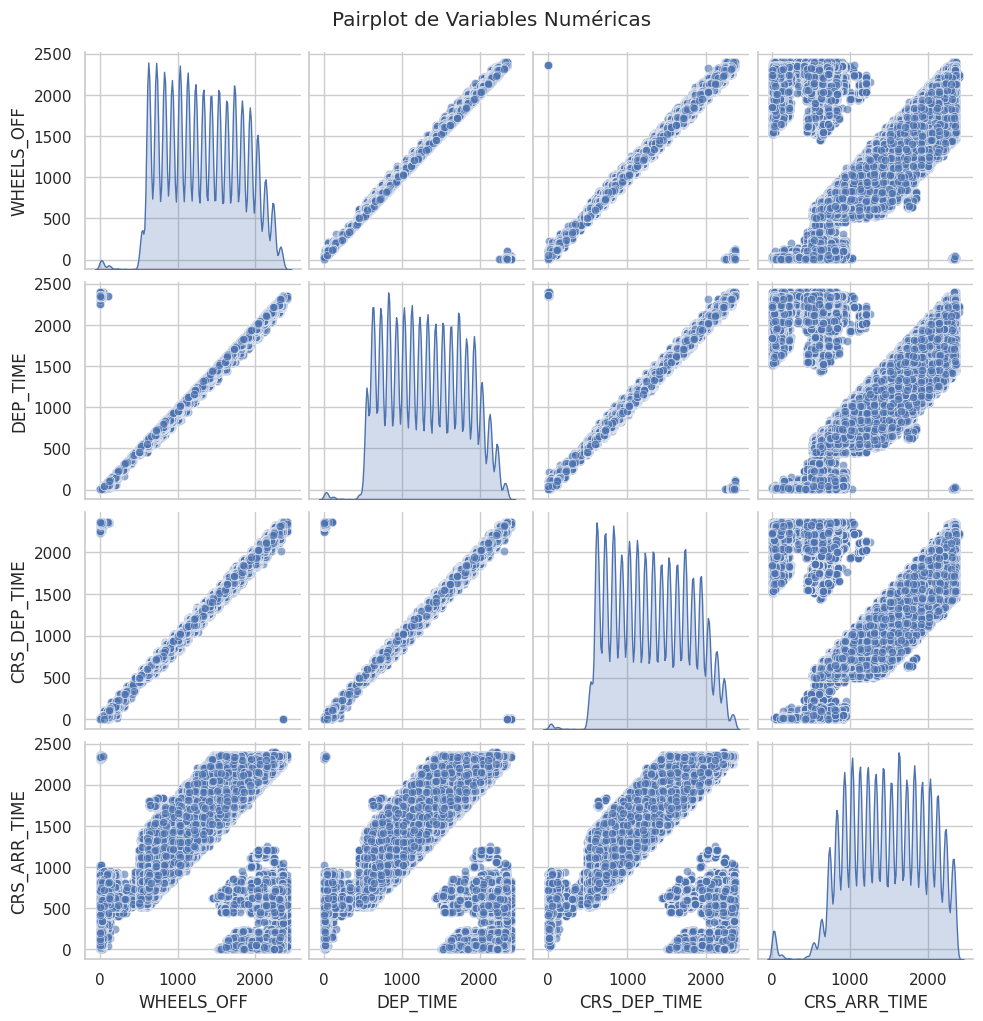

In [ ]:
numeric_columns = ['WHEELS_OFF', 'DEP_TIME', 'CRS_DEP_TIME', 'CRS_ARR_TIME']

plt.figure(figsize=(10, 8))
sns.pairplot(df3[numeric_columns], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot de Variables Numéricas', y=1.02)
plt.show()

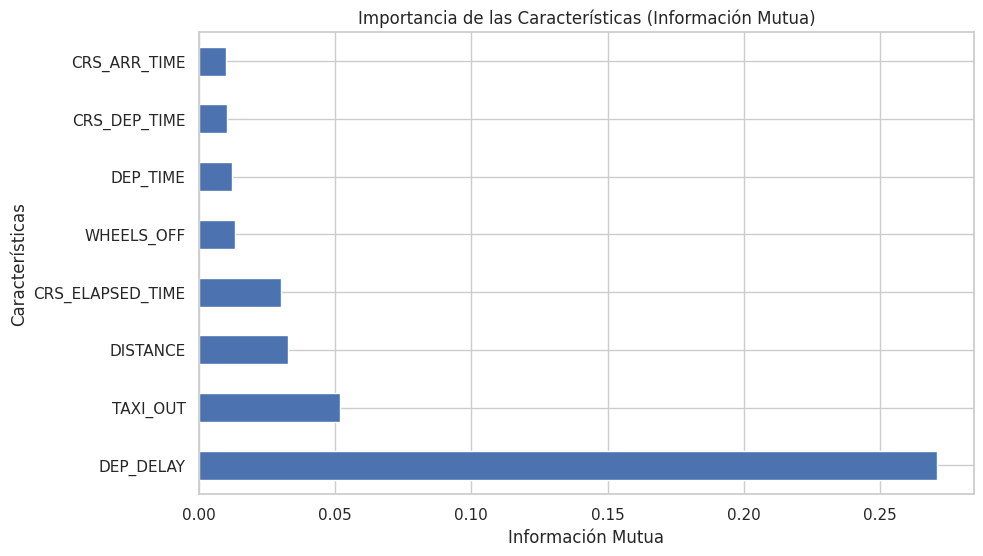

In [ ]:
sample_df = df3.sample(frac=0.1, random_state=42)

X = sample_df[['CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME', 'DISTANCE']]
y = sample_df['ARR_DELAY']

X_new = mutual_info_regression(X, y)

feat_imp = pd.Series(X_new, index=X.columns)
feat_imp.sort_values(ascending=False).plot(kind='barh', figsize=(10, 6))
plt.title('Importancia de las Características (Información Mutua)')
plt.xlabel('Información Mutua')
plt.ylabel('Características')
plt.show()

CRS_DEP_TIME        -0.170888
DEP_TIME            -0.000000
DEP_DELAY            9.602220
TAXI_OUT             5.188026
WHEELS_OFF          -0.000000
CRS_ARR_TIME        -0.000000
CRS_ELAPSED_TIME   -13.005877
DISTANCE            10.726104
dtype: float64


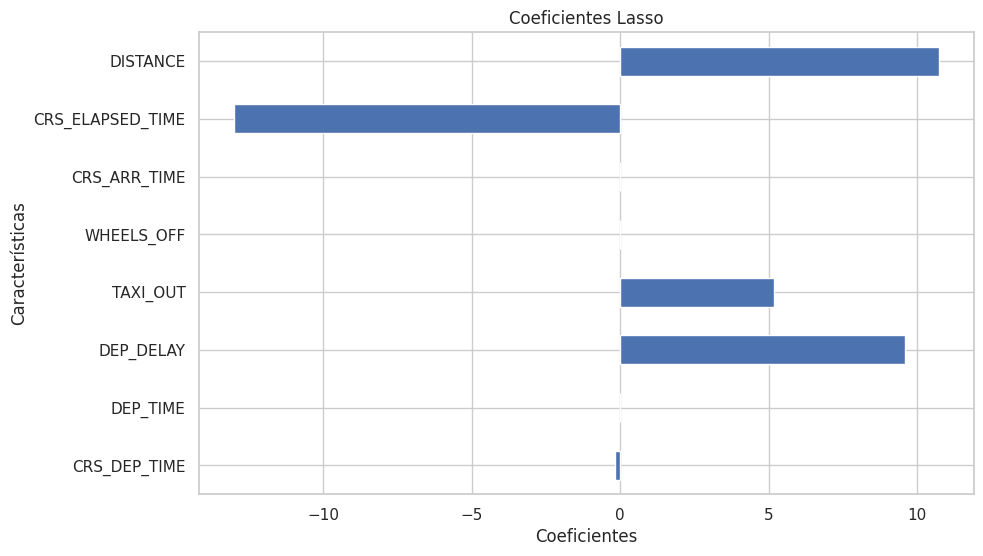

In [ ]:
X = df3[['CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT',
          'WHEELS_OFF', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME', 'DISTANCE']]
y = df3['ARR_DELAY']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# LASSO regularization (L1)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

coef = pd.Series(lasso.coef_, index=X.columns)
print(coef)

coef.plot(kind='barh', figsize=(10, 6))
plt.title('Coeficientes Lasso')
plt.xlabel('Coeficientes')
plt.ylabel('Características')
plt.show()

Se realizó una selección de características de las variables, generando un heatmap que muestra la correlación entre las variables numéricas en estudio. Como resultado, se observó que las variables Wheels Off, Dep Time, CRS Dep Time y CRS Arr Time están interrelacionadas. Esto indica que:

* Wheels Off y Dep Time están directamente conectadas,
sugiriendo que el tiempo de despegue (Dep Time) influye en el momento en que las ruedas del avión se levantan del suelo (Wheels Off).

* CRS Dep Time (tiempo de salida programado) y Dep Time también presentan una fuerte correlación, lo que implica que los retrasos en el tiempo de despegue real tienden a estar relacionados con las programaciones iniciales.

* Además, CRS Arr Time (tiempo de llegada programado) muestra una conexión con estas variables, lo que sugiere que cualquier variación en los tiempos de despegue puede impactar directamente en los tiempos de llegada.

Estas correlaciones son cruciales para entender cómo las diferentes variables influyen en los retrasos y la puntualidad de los vuelos.

Asimismo, se analizó la relación entre las características y Arr Delay, y se determinó que la variable Dep Delay es la que presenta la correlación más fuerte con Arr Delay.

Esto se debe a que los retrasos en la salida de un vuelo (Dep Delay) tienden a tener un efecto directo en el tiempo de llegada (Arr Delay). Si un vuelo se retrasa en despegar, es probable que también llegue más tarde de lo programado, ya que las horas de vuelo y las condiciones de tránsito aéreo son factores constantes que influyen en la duración total del viaje.


***Reducción de dimensionalidad***

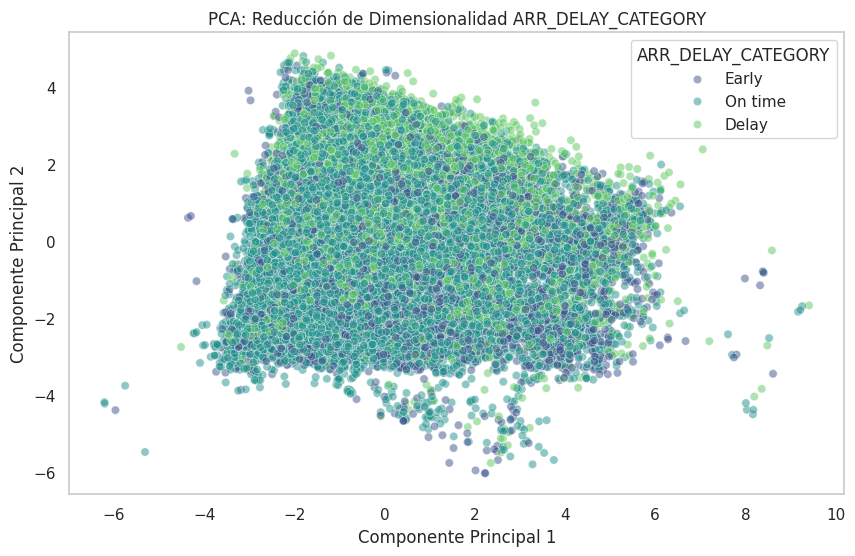

In [ ]:
df_subset = df.sample(n=50000, random_state=42)

def categorize_arr_delay(arr_delay):
    if arr_delay < -15:
        return 'Early'
    elif arr_delay > 15:
        return 'Delay'
    else:
        return 'On time'

df_subset['ARR_DELAY_CATEGORY'] = df_subset['ARR_DELAY'].apply(categorize_arr_delay)

X = df_subset[['CRS_DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
                'CRS_ARR_TIME', 'CRS_ELAPSED_TIME', 'DISTANCE',
                'OP_CARRIER', 'ORIGIN', 'DEST']]

X = pd.get_dummies(X, columns=['OP_CARRIER', 'ORIGIN', 'DEST'], drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_subset['ARR_DELAY_CATEGORY'], palette='viridis', alpha=0.5)
plt.title('PCA: Reducción de Dimensionalidad ARR_DELAY_CATEGORY')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='ARR_DELAY_CATEGORY')
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:455: UserWarning: Exited at iteration 106 with accuracies 
[1.12677381e-05 5.36777881e-06 2.59141347e-04 5.09723567e-04]
not reaching the requested tolerance 1.1339783668518066e-05.
Use iteration 99 instead with accuracy 
0.00018207290278193962.

  _, diffusion_map = lobpcg(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:455: UserWarning: Exited postprocessing with accuracies 
[2.47780600e-05 1.94332245e-05 2.36106177e-04 4.479

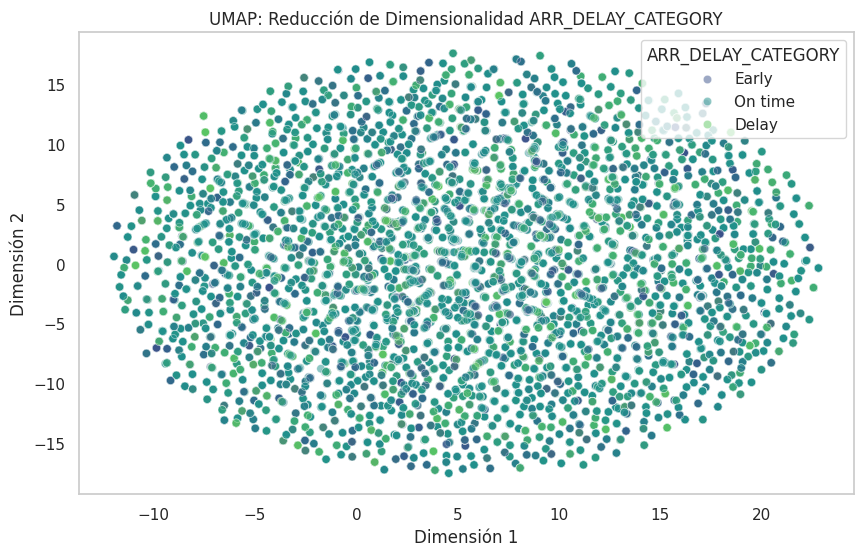

In [ ]:
df_subset = df.sample(n=50000, random_state=42)
def categorize_arr_delay(arr_delay):
    if arr_delay < -15:
        return 'Early'
    elif arr_delay > 15:
        return 'Delay'
    else:
        return 'On time'

df_subset['ARR_DELAY_CATEGORY'] = df_subset['ARR_DELAY'].apply(categorize_arr_delay)

X = df_subset[['CRS_DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
                'CRS_ARR_TIME', 'CRS_ELAPSED_TIME', 'DISTANCE',
                'OP_CARRIER', 'ORIGIN', 'DEST']]

X = pd.get_dummies(X, columns=['OP_CARRIER', 'ORIGIN', 'DEST'], drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=df_subset['ARR_DELAY_CATEGORY'], palette='viridis', alpha=0.5)
plt.title('UMAP: Reducción de Dimensionalidad ARR_DELAY_CATEGORY')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.legend(title='ARR_DELAY_CATEGORY')
plt.grid()
plt.show()

A partir de un análisis de reducción de dimensionalidad utilizando PCA y UMAP, se observó una mayor separación en los datos con el método UMAP. La separación se llevó a cabo en función de las categorías de "Early", "On time" y "Delay". Aunque los resultados de UMAP son superiores a los de PCA, la visualización aún no permite apreciar claramente la separación de los datos.

***Algoritmos de inferencia***

In [13]:
pip install catboost --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.5 MB/s eta 0:00:00


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.linear_model import LinearRegression, Ridge, Lasso, Perceptron
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from catboost import CatBoostClassifier
import xgboost as xgb

In [49]:
df_subset = df3.sample(n=50000, random_state=42)
X = df_subset[['CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT',
                'WHEELS_OFF', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME', 'DISTANCE']]
y = df_subset['ARR_DELAY']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo de regresión de Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

y_pred_ridge = ridge_model.predict(X_test_scaled)

print("Resultados de la Regresión Ridge:")
print(f"MSE: {mean_squared_error(y_test, y_pred_ridge):.4f}")
print(f"R^2: {r2_score(y_test, y_pred_ridge):.4f}")

# Modelo de regresión Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)

y_pred_lasso = lasso_model.predict(X_test_scaled)

print("Resultados de la Regresión Lasso:")
print(f"MSE: {mean_squared_error(y_test, y_pred_lasso):.4f}")
print(f"R^2: {r2_score(y_test, y_pred_lasso):.4f}")

# Modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

y_pred = linear_model.predict(X_test_scaled)

print("Resultados de la Regresión Lineal:")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"R^2: {r2_score(y_test, y_pred):.4f}")

Resultados de la Regresión Ridge:
MSE: 80.7587
R^2: 0.5977
Resultados de la Regresión Lasso:
MSE: 82.3954
R^2: 0.5895
Resultados de la Regresión Lineal:
MSE: 80.7581
R^2: 0.5977


Resultados del Árbol de Decisión:
              precision    recall  f1-score   support

       Delay       0.54      0.60      0.57      1030
       Early       0.42      0.42      0.42      1926
     On time       0.79      0.78      0.78      7044

    accuracy                           0.69     10000
   macro avg       0.58      0.60      0.59     10000
weighted avg       0.69      0.69      0.69     10000



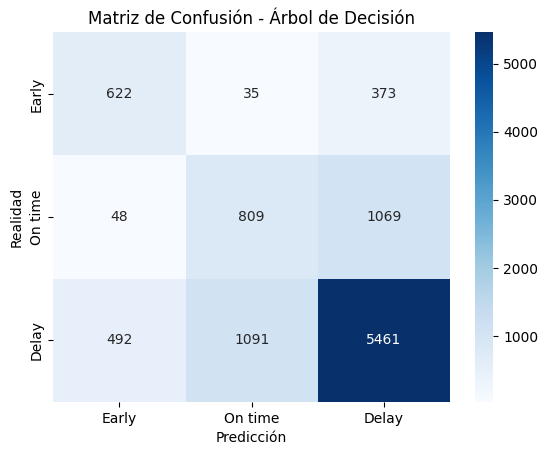

Sensibilidad por clase: [0.6038835  0.42004154 0.77526973]
F1-score macro: 0.5898960485161164
Especificidad por clase: [0.93979933 0.86054    0.51217862]
Precisión (accuracy): 0.6892000000


In [10]:
df_subset = df3.sample(n=50000, random_state=42)

def categorize_arr_delay(arr_delay):
    if arr_delay < -15:
        return 'Early'
    elif arr_delay > 15:
        return 'Delay'
    else:
        return 'On time'

df_subset['ARR_DELAY_CATEGORY'] = df_subset['ARR_DELAY'].apply(categorize_arr_delay)

X = df_subset[['CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT',
                'WHEELS_OFF', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME', 'DISTANCE']]
y = df_subset['ARR_DELAY_CATEGORY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train_balanced)

y_pred = dt_model.predict(X_test_scaled)

print("Resultados del Árbol de Decisión:")
print(classification_report(y_test, y_pred))
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Early", "On time", "Delay"],
                yticklabels=["Early", "On time", "Delay"])
    plt.title("Matriz de Confusión - Árbol de Decisión")
    plt.xlabel('Predicción')
    plt.ylabel('Realidad')
    plt.show()

plot_confusion_matrix(y_test, y_pred)
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
# Sensibilidad (recall) por clase
sensitivity = cm.diagonal() / cm.sum(axis=1)
print("Sensibilidad por clase:", sensitivity)
# F1-score macro
f1_macro = f1_score(y_test, y_pred, average='macro')
print("F1-score macro:", f1_macro)
# Especificidad por clase
specificity = np.zeros(cm.shape[0])
for i in range(cm.shape[0]):
    tn = cm.sum() - cm[i, :].sum() - cm[:, i].sum() + cm[i, i]
    fp = cm[:, i].sum() - cm[i, i]
    specificity[i] = tn / (tn + fp)

print("Especificidad por clase:", specificity)
accuracy = np.mean(y_pred == y_test)
print("Precisión (accuracy): {:.10f}".format(accuracy))

Resultados del Árbol de Decisión (C4.5):
              precision    recall  f1-score   support

       Delay       0.52      0.59      0.55      1030
       Early       0.41      0.43      0.42      1926
     On time       0.79      0.76      0.77      7044

    accuracy                           0.68     10000
   macro avg       0.57      0.59      0.58     10000
weighted avg       0.69      0.68      0.68     10000



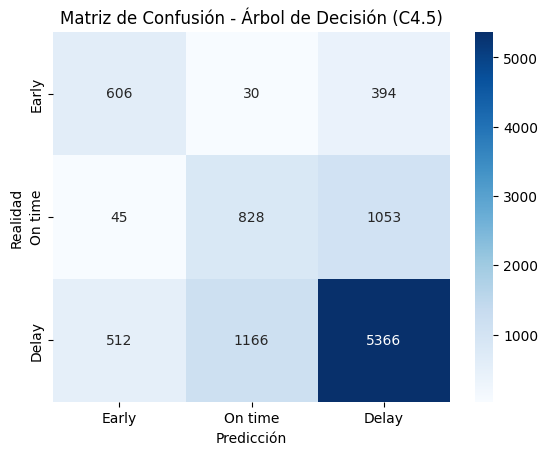

Sensibilidad por clase: [0.58834951 0.42990654 0.76178308]
F1-score macro: 0.5821300987
Especificidad por clase: [0.93790412 0.8518702  0.51048714]
Precisión (accuracy): 0.6800000000


In [34]:
# Arbol de decisión (C4.5)
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model.fit(X_train_scaled, y_train_balanced)

y_pred = dt_model.predict(X_test_scaled)

print("Resultados del Árbol de Decisión (C4.5):")
print(classification_report(y_test, y_pred))

# Matriz de confusión
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Early", "On time", "Delay"],
                yticklabels=["Early", "On time", "Delay"])
    plt.title("Matriz de Confusión - Árbol de Decisión (C4.5)")
    plt.xlabel('Predicción')
    plt.ylabel('Realidad')
    plt.show()
plot_confusion_matrix(y_test, y_pred)

# Cálculo de métricas adicionales
cm = confusion_matrix(y_test, y_pred)
# Sensibilidad (recall) por clase
sensitivity = cm.diagonal() / cm.sum(axis=1)
print("Sensibilidad por clase:", sensitivity)
# F1-score macro
f1_macro = f1_score(y_test, y_pred, average='macro')
print("F1-score macro: {:.10f}".format(f1_macro))
# Especificidad por clase
specificity = np.zeros(cm.shape[0])
for i in range(cm.shape[0]):
    tn = cm.sum() - cm[i, :].sum() - cm[:, i].sum() + cm[i, i]
    fp = cm[:, i].sum() - cm[i, i]
    specificity[i] = tn / (tn + fp)

print("Especificidad por clase:", specificity)
# Precisión (accuracy)
accuracy = np.mean(y_pred == y_test)
print("Precisión (accuracy): {:.10f}".format(accuracy))

Resultados del Árbol de Decisión (ID3):
              precision    recall  f1-score   support

       Delay       0.56      0.56      0.56      1030
       Early       0.42      0.43      0.43      1926
     On time       0.79      0.79      0.79      7044

    accuracy                           0.69     10000
   macro avg       0.59      0.59      0.59     10000
weighted avg       0.69      0.69      0.69     10000



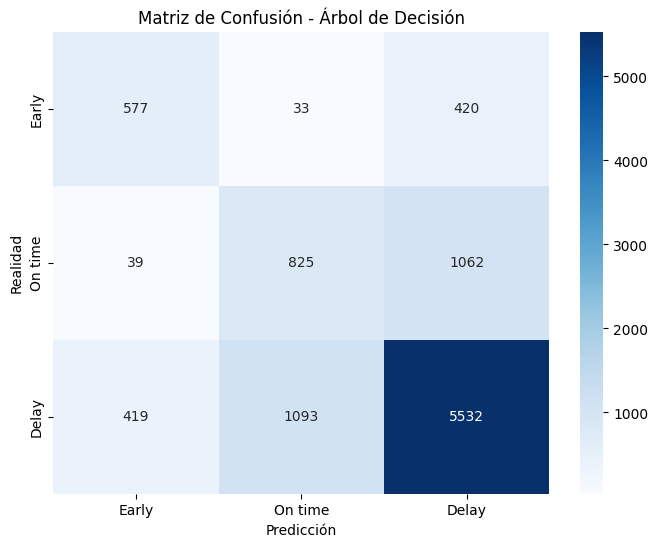

Sensibilidad por clase: [0.56019417 0.42834891 0.78534923]
F1-score macro: 0.5904832492
Especificidad por clase: [0.94894091 0.86054001 0.49864682]
Accuracy: 0.6934000000


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

print("Resultados del Árbol de Decisión (ID3):")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
# Matriz de confusión
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Early", "On time", "Delay"],
                yticklabels=["Early", "On time", "Delay"])
    plt.title("Matriz de Confusión - Árbol de Decisión")
    plt.xlabel('Predicción')
    plt.ylabel('Realidad')
    plt.show()

plot_confusion_matrix(y_test, y_pred)
# Cálculo de F1-score macro, sensibilidad y especificidad
cm = confusion_matrix(y_test, y_pred)
# Sensibilidad (recall) por clase
sensitivity = cm.diagonal() / cm.sum(axis=1)
print("Sensibilidad por clase:", np.round(sensitivity, 10))
# F1-score macro
f1_macro = f1_score(y_test, y_pred, average='macro')
print(f"F1-score macro: {f1_macro:.10f}")

specificity = np.zeros(cm.shape[0])
for i in range(cm.shape[0]):
    tn = cm.sum() - cm[i, :].sum() - cm[:, i].sum() + cm[i, i]
    fp = cm[:, i].sum() - cm[i, i]
    specificity[i] = tn / (tn + fp)

print("Especificidad por clase:", np.round(specificity, 10))
print(f"Accuracy: {accuracy:.10f}")

Resultados del modelo CatBoost:
              precision    recall  f1-score   support

       Delay       0.72      0.68      0.70      1030
       Early       0.59      0.44      0.50      1926
     On time       0.82      0.88      0.85      7044

    accuracy                           0.78     10000
   macro avg       0.71      0.67      0.68     10000
weighted avg       0.76      0.78      0.77     10000



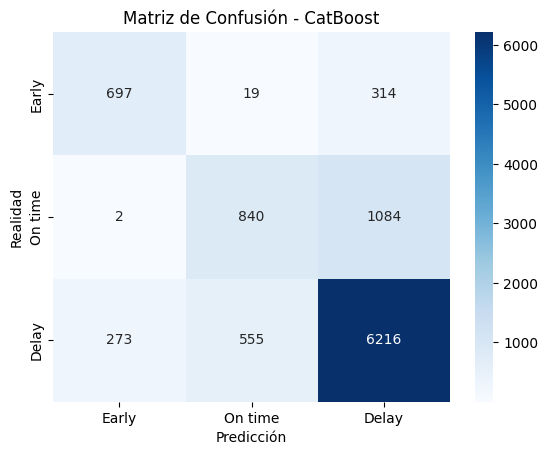

Sensibilidad por clase: [0.67669903 0.43613707 0.88245315]
F1-score macro: 0.6824784146987878
Especificidad por clase: [0.96934225 0.9289076  0.5270636 ]
Precisión (accuracy): 0.7753000000


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Modelo CatBoost
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose=0)
catboost_model.fit(X_train_scaled, y_train_balanced)

y_pred = catboost_model.predict(X_test_scaled)
print("Resultados del modelo CatBoost:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Early", "On time", "Delay"],
                yticklabels=["Early", "On time", "Delay"])
    plt.title("Matriz de Confusión - CatBoost")
    plt.xlabel('Predicción')
    plt.ylabel('Realidad')
    plt.show()

plot_confusion_matrix(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
# Sensibilidad (recall) por clase
sensitivity = cm.diagonal() / cm.sum(axis=1)
print("Sensibilidad por clase:", sensitivity)
# F1-score macro
f1_macro = f1_score(y_test, y_pred, average='macro')
print("F1-score macro:", f1_macro)
# Especificidad por clase
specificity = np.zeros(cm.shape[0])
for i in range(cm.shape[0]):
    tn = cm.sum() - cm[i, :].sum() - cm[:, i].sum() + cm[i, i]
    fp = cm[:, i].sum() - cm[i, i]
    specificity[i] = tn / (tn + fp)

print("Especificidad por clase:", specificity)

accuracy = accuracy_score(y_test, y_pred)
print("Precisión (accuracy): {:.10f}".format(accuracy))

Resultados del Modelo Random Forest:
              precision    recall  f1-score   support

       Delay       0.79      0.57      0.67      1030
       Early       0.56      0.31      0.40      1926
     On time       0.79      0.91      0.85      7044

    accuracy                           0.76     10000
   macro avg       0.71      0.60      0.64     10000
weighted avg       0.74      0.76      0.74     10000



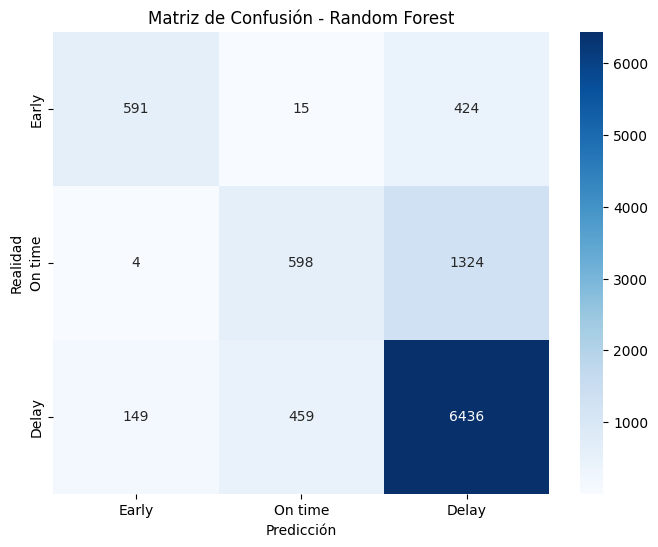

Sensibilidad por clase: [0.57378641 0.31048806 0.91368541]
F1-score macro: 0.6368361637
Especificidad por clase: [0.98294314 0.94129304 0.40866035]
Accuracy: 0.7625000000


In [ ]:
# Modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

print("Resultados del Modelo Random Forest:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)

# Matriz de confusión
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Early", "On time", "Delay"],
                yticklabels=["Early", "On time", "Delay"])
    plt.title("Matriz de Confusión - Random Forest")
    plt.xlabel('Predicción')
    plt.ylabel('Realidad')
    plt.show()

plot_confusion_matrix(y_test, y_pred)
# F1-score macro, sensibilidad y especificidad
cm = confusion_matrix(y_test, y_pred)
# Sensibilidad (recall)
sensitivity = cm.diagonal() / cm.sum(axis=1)
print("Sensibilidad por clase:", np.round(sensitivity, 10))
# F1-score macro
f1_macro = f1_score(y_test, y_pred, average='macro')
print(f"F1-score macro: {f1_macro:.10f}")
# Especificidad por clase
specificity = np.zeros(cm.shape[0])
for i in range(cm.shape[0]):
    tn = cm.sum() - cm[i, :].sum() - cm[:, i].sum() + cm[i, i]
    fp = cm[:, i].sum() - cm[i, i]
    specificity[i] = tn / (tn + fp)

print("Especificidad por clase:", np.round(specificity, 10))
print(f"Accuracy: {accuracy:.10f}")

Resultados de la Regresión Logística:
              precision    recall  f1-score   support

       Delay       0.51      0.83      0.63      1030
       Early       0.45      0.76      0.56      1926
     On time       0.89      0.64      0.74      7044

    accuracy                           0.68     10000
   macro avg       0.62      0.74      0.65     10000
weighted avg       0.76      0.68      0.70     10000



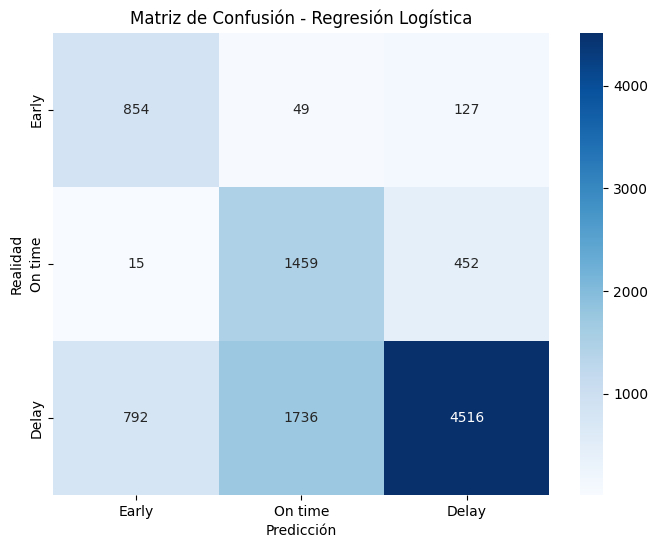

Sensibilidad por clase: [0.82912621 0.75752856 0.641113  ]
F1-score macro: 0.6477221514
Especificidad por clase: [0.91003344 0.77891999 0.8041272 ]
Accuracy: 0.6829000000


In [39]:
# Modelo de regresión logística
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train_balanced)

y_pred = logistic_model.predict(X_test_scaled)

print("Resultados de la Regresión Logística:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)

# Matriz de confusión
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Early", "On time", "Delay"],
                yticklabels=["Early", "On time", "Delay"])
    plt.title("Matriz de Confusión - Regresión Logística")
    plt.xlabel('Predicción')
    plt.ylabel('Realidad')
    plt.show()
plot_confusion_matrix(y_test, y_pred)
# F1-score macro, sensibilidad y especificidad
cm = confusion_matrix(y_test, y_pred)
# Sensibilidad (recall) por clase
sensitivity = cm.diagonal() / cm.sum(axis=1)
print("Sensibilidad por clase:", np.round(sensitivity, 10))
# F1-score macro
f1_macro = f1_score(y_test, y_pred, average='macro')
print(f"F1-score macro: {f1_macro:.10f}")

specificity = np.zeros(cm.shape[0])
for i in range(cm.shape[0]):
    tn = cm.sum() - cm[i, :].sum() - cm[:, i].sum() + cm[i, i]
    fp = cm[:, i].sum() - cm[i, i]
    specificity[i] = tn / (tn + fp)
print("Especificidad por clase:", np.round(specificity, 10))
print(f"Accuracy: {accuracy:.10f}")

Resultados del modelo de Naive Bayes:
              precision    recall  f1-score   support

       Delay       0.44      0.82      0.57      1030
       Early       0.31      0.80      0.45      1926
     On time       0.86      0.39      0.53      7044

    accuracy                           0.51     10000
   macro avg       0.54      0.67      0.52     10000
weighted avg       0.71      0.51      0.52     10000



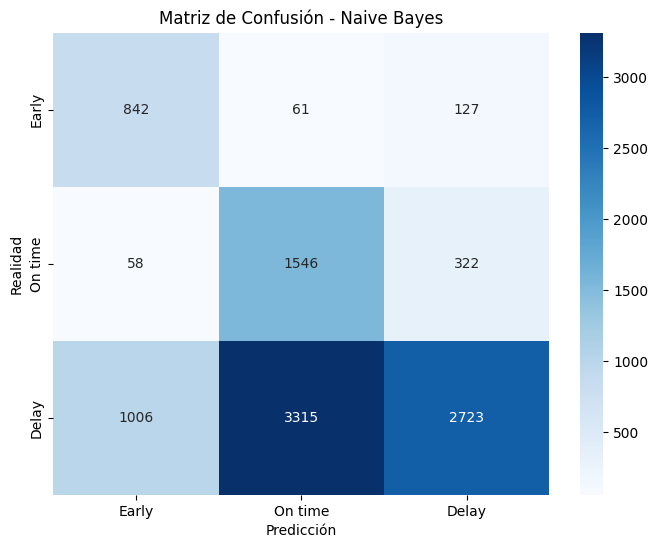

Sensibilidad por clase: [0.81747573 0.8026999  0.38657013]
F1-score macro: 0.5193911767
Especificidad por clase: [0.88138239 0.58186772 0.84810555]
Accuracy: 0.5111000000


In [40]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Modelo de Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train_balanced)

y_pred = nb_model.predict(X_test_scaled)

print("Resultados del modelo de Naive Bayes:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
# Matriz de confusión
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Early", "On time", "Delay"],
                yticklabels=["Early", "On time", "Delay"])
    plt.title("Matriz de Confusión - Naive Bayes")
    plt.xlabel('Predicción')
    plt.ylabel('Realidad')
    plt.show()

plot_confusion_matrix(y_test, y_pred)
# F1-score macro, sensibilidad y especificidad
cm = confusion_matrix(y_test, y_pred)
# Sensibilidad (recall) por clase
sensitivity = cm.diagonal() / cm.sum(axis=1)
print("Sensibilidad por clase:", np.round(sensitivity, 10))
# F1-score macro
f1_macro = f1_score(y_test, y_pred, average='macro')
print(f"F1-score macro: {f1_macro:.10f}")
# Especificidad por clase
specificity = np.zeros(cm.shape[0])
for i in range(cm.shape[0]):
    tn = cm.sum() - cm[i, :].sum() - cm[:, i].sum() + cm[i, i]
    fp = cm[:, i].sum() - cm[i, i]
    specificity[i] = tn / (tn + fp)

print("Especificidad por clase:", np.round(specificity, 10))
print(f"Accuracy: {accuracy:.10f}")

Resultados del Modelo Naive Bayes:
              precision    recall  f1-score   support

       Delay       0.63      0.68      0.66      1030
       Early       0.42      0.20      0.27      1926
     On time       0.77      0.87      0.82      7044

    accuracy                           0.72     10000
   macro avg       0.61      0.58      0.58     10000
weighted avg       0.69      0.72      0.70     10000



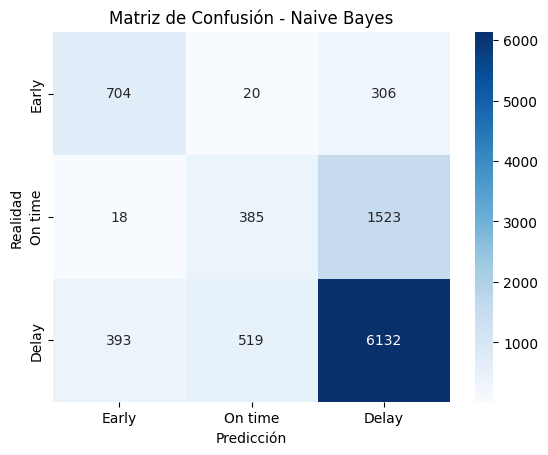

In [ ]:
# Modelo de Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

y_pred = nb_model.predict(X_test_scaled)

print("Resultados del Modelo Naive Bayes:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Early", "On time", "Delay"],
                yticklabels=["Early", "On time", "Delay"])
    plt.title("Matriz de Confusión - Naive Bayes")
    plt.xlabel('Predicción')
    plt.ylabel('Realidad')
    plt.show()

plot_confusion_matrix(y_test, y_pred)

Resultados del Modelo k-NN:
              precision    recall  f1-score   support

       Delay       0.76      0.56      0.64      1030
       Early       0.46      0.31      0.37      1926
     On time       0.78      0.88      0.83      7044

    accuracy                           0.74     10000
   macro avg       0.67      0.58      0.61     10000
weighted avg       0.72      0.74      0.72     10000



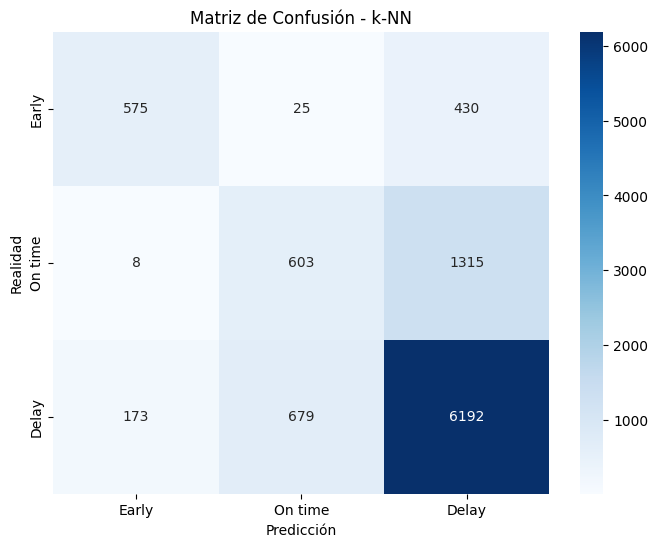

Sensibilidad por clase: [0.55825243 0.31308411 0.879046  ]
F1-score macro: 0.6145240700
Especificidad por clase: [0.97982163 0.91280654 0.40967524]
Accuracy: 0.7370000000


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo k-NN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

print("Resultados del Modelo k-NN:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)

# Matriz de confusión
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Early", "On time", "Delay"],
                yticklabels=["Early", "On time", "Delay"])
    plt.title("Matriz de Confusión - k-NN")
    plt.xlabel('Predicción')
    plt.ylabel('Realidad')
    plt.show()

plot_confusion_matrix(y_test, y_pred)

# F1-score macro, sensibilidad y especificidad
cm = confusion_matrix(y_test, y_pred)
# Sensibilidad (recall) por clase
sensitivity = cm.diagonal() / cm.sum(axis=1)
print("Sensibilidad por clase:", np.round(sensitivity, 10))
# F1-score macro
f1_macro = f1_score(y_test, y_pred, average='macro')
print(f"F1-score macro: {f1_macro:.10f}")
# Especificidad por clase
specificity = np.zeros(cm.shape[0])
for i in range(cm.shape[0]):
    tn = cm.sum() - cm[i, :].sum() - cm[:, i].sum() + cm[i, i]
    fp = cm[:, i].sum() - cm[i, i]
    specificity[i] = tn / (tn + fp)

print("Especificidad por clase:", np.round(specificity, 10))
print(f"Accuracy: {accuracy:.10f}")

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de y_train:", y_train.shape)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

Tamaño de X_train: (40000, 8)
Tamaño de y_train: (40000,)


SVC(kernel='linear', random_state=42)

Resultados del Modelo SVM:
              precision    recall  f1-score   support

       Delay       0.83      0.57      0.68      1030
       Early       0.61      0.16      0.25      1926
     On time       0.77      0.96      0.85      7044

    accuracy                           0.76     10000
   macro avg       0.74      0.56      0.59     10000
weighted avg       0.74      0.76      0.72     10000



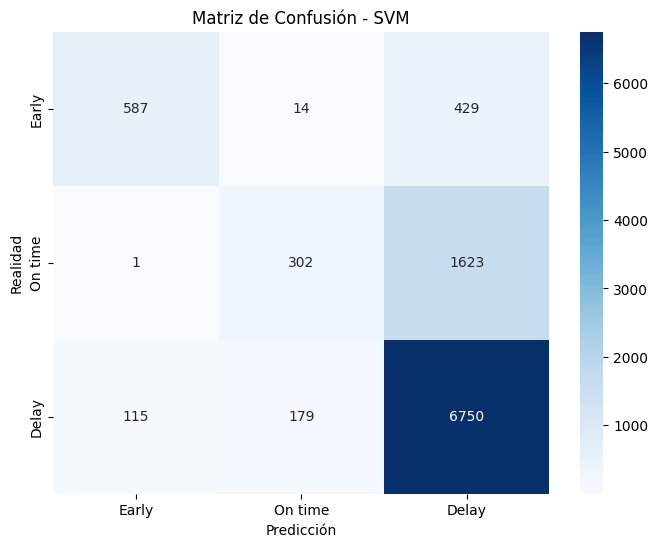

Sensibilidad por clase: [0.56990291 0.15680166 0.95826235]
F1-score macro: 0.5929572241
Especificidad por clase: [0.987068   0.97609611 0.30581867]
Accuracy: 0.7639000000


In [43]:
# Modelo SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

print("Resultados del Modelo SVM:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)

# Matriz de confusión
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Early", "On time", "Delay"],
                yticklabels=["Early", "On time", "Delay"])
    plt.title("Matriz de Confusión - SVM")
    plt.xlabel('Predicción')
    plt.ylabel('Realidad')
    plt.show()

plot_confusion_matrix(y_test, y_pred)
# F1-score macro, sensibilidad y especificidad
cm = confusion_matrix(y_test, y_pred)
# Sensibilidad (recall) por clase
sensitivity = cm.diagonal() / cm.sum(axis=1)
print("Sensibilidad por clase:", np.round(sensitivity, 10))
# F1-score macro
f1_macro = f1_score(y_test, y_pred, average='macro')
print(f"F1-score macro: {f1_macro:.10f}")
# Especificidad por clase
specificity = np.zeros(cm.shape[0])
for i in range(cm.shape[0]):
    tn = cm.sum() - cm[i, :].sum() - cm[:, i].sum() + cm[i, i]
    fp = cm[:, i].sum() - cm[i, i]
    specificity[i] = tn / (tn + fp)

print("Especificidad por clase:", np.round(specificity, 10))
print(f"Accuracy: {accuracy:.10f}")

Resultados del Modelo SVM:
              precision    recall  f1-score   support

       Delay       0.81      0.59      0.69      2118
       Early       0.58      0.15      0.24      3885
     On time       0.76      0.95      0.85     13997

    accuracy                           0.76     20000
   macro avg       0.72      0.57      0.59     20000
weighted avg       0.73      0.76      0.71     20000



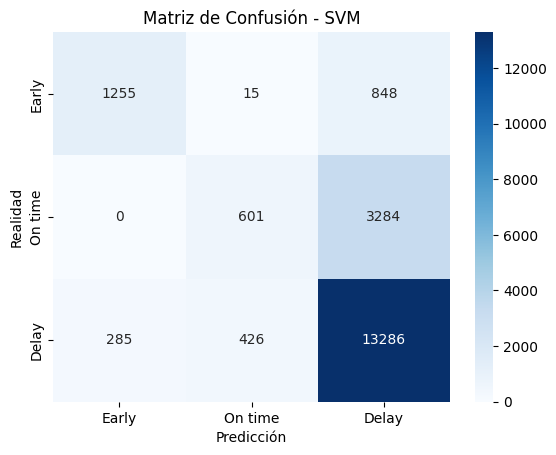

In [25]:
df_sample = df3.sample(n=100_000, random_state=42)

# Categorizar los retrasos
def categorize_arr_delay(arr_delay):
    if arr_delay < -15:
        return "Early"
    elif arr_delay > 15:
        return "Delay"
    else:
        return "On time"

df_sample['ARR_DELAY_CATEGORY'] = df_sample['ARR_DELAY'].apply(categorize_arr_delay)

# Seleccionar características y variable objetivo
X = df_sample[['CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT',
                'WHEELS_OFF', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME', 'DISTANCE']]
y = df_sample['ARR_DELAY_CATEGORY']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predicciones
y_pred = svm_model.predict(X_test_scaled)

# Resultados
print("Resultados del Modelo SVM:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Early", "On time", "Delay"],
                yticklabels=["Early", "On time", "Delay"])
    plt.title("Matriz de Confusión - SVM")
    plt.xlabel('Predicción')
    plt.ylabel('Realidad')
    plt.show()

plot_confusion_matrix(y_test, y_pred)

Resultados del Modelo Linear SVC:
              precision    recall  f1-score   support

       Delay       0.82      0.45      0.58     20580
       Early       0.57      0.11      0.19     38860
     On time       0.75      0.96      0.84    140560

    accuracy                           0.75    200000
   macro avg       0.71      0.51      0.54    200000
weighted avg       0.72      0.75      0.69    200000



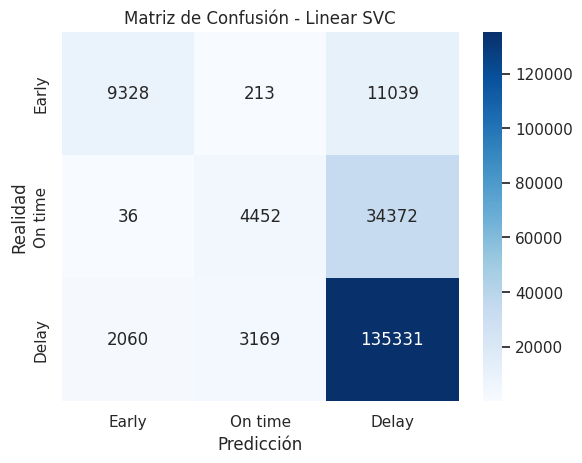

In [ ]:
df_sample = df3.sample(n=1_000_000, random_state=42)

def categorize_arr_delay(arr_delay):
    if arr_delay < -15:
        return "Early"
    elif arr_delay > 15:
        return "Delay"
    else:
        return "On time"

df_sample['ARR_DELAY_CATEGORY'] = df_sample['ARR_DELAY'].apply(categorize_arr_delay)

X = df_sample[['CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT',
                'WHEELS_OFF', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME', 'DISTANCE']]
y = df_sample['ARR_DELAY_CATEGORY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo usando LinearSVC
linear_svc_model = LinearSVC(random_state=42, max_iter=10000)
linear_svc_model.fit(X_train_scaled, y_train)

y_pred = linear_svc_model.predict(X_test_scaled)

print("Resultados del Modelo Linear SVC:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Early", "On time", "Delay"],
                yticklabels=["Early", "On time", "Delay"])
    plt.title("Matriz de Confusión - Linear SVC")
    plt.xlabel('Predicción')
    plt.ylabel('Realidad')
    plt.show()

plot_confusion_matrix(y_test, y_pred)

Al comprobar que el mejor modelo de clasificación para los datos fue el modelo de SVM, se procedió a entrenarlo en tres etapas: primero con 50,000 datos, luego con 100,000 y finalmente con 1,000,000 de registros. El objetivo de este enfoque fue observar cómo se comportaba el modelo al incrementar la cantidad de datos. Sin embargo, al trabajar con el conjunto de 1,000,000 de datos, se realizaron ajustes en el código para optimizar los costos computacionales. En particular, se optó por utilizar un kernel lineal mediante LinearSVC, que es más eficiente en términos de tiempo de computación para conjuntos de datos grandes.

***Datos de test***

In [23]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Practice 4/test_airlines_delay_challenge.csv')
df_test.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,CRS_ARR_TIME,CRS_ELAPSED_TIME,DISTANCE
0,2018-07-13,B6,574,TPA,EWR,929,924.0,-5.0,13.0,937.0,1215,166.0,997.0
1,2018-09-11,UA,256,DEN,SFO,750,750.0,0.0,18.0,808.0,928,158.0,967.0
2,2018-07-22,WN,3252,AUS,PHX,1710,1820.0,70.0,8.0,1828.0,1730,140.0,872.0
3,2018-04-30,AA,1422,BOS,JFK,1440,1431.0,-9.0,17.0,1448.0,1607,87.0,187.0
4,2018-05-09,WN,187,HOU,ATL,710,709.0,-1.0,11.0,720.0,1010,120.0,696.0


In [24]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250000 entries, 0 to 2249999
Data columns (total 13 columns):
 #   Column             Dtype  
---  ------             -----  
 0   FL_DATE            object 
 1   OP_CARRIER         object 
 2   OP_CARRIER_FL_NUM  int64  
 3   ORIGIN             object 
 4   DEST               object 
 5   CRS_DEP_TIME       int64  
 6   DEP_TIME           float64
 7   DEP_DELAY          float64
 8   TAXI_OUT           float64
 9   WHEELS_OFF         float64
 10  CRS_ARR_TIME       int64  
 11  CRS_ELAPSED_TIME   float64
 12  DISTANCE           float64
dtypes: float64(6), int64(3), object(4)
memory usage: 223.2+ MB


In [ ]:
df_test.count()

,0
FL_DATE,2250000
OP_CARRIER,2250000
OP_CARRIER_FL_NUM,2250000
ORIGIN,2250000
DEST,2250000
CRS_DEP_TIME,2250000
DEP_TIME,2250000
DEP_DELAY,2250000
TAXI_OUT,2250000
WHEELS_OFF,2250000


***Limpieza de datos***

In [25]:
# Contar cuántos renglones hay antes de eliminar duplicados
initial_count = df_test.shape[0]
# Quitar renglones duplicados
df_test2 = df_test.drop_duplicates()
final_count = df_test2.shape[0]
# Calcular cuántos se eliminaron
duplicates_removed = initial_count - final_count
print(f"Número de renglones duplicados eliminados: {duplicates_removed}")

Número de renglones duplicados eliminados: 0


In [26]:
# Categorical columns
cat_col = [col for col in df_test2.columns if df_test2[col].dtype == 'object']
print('Categorical columns :', cat_col)
# Numerical columns
num_col = [col for col in df_test2.columns if df_test2[col].dtype != 'object']
print('Numerical columns :' ,num_col)

Categorical columns : ['FL_DATE', 'OP_CARRIER', 'ORIGIN', 'DEST']
Numerical columns : ['OP_CARRIER_FL_NUM', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME', 'DISTANCE']


In [ ]:
df_test2.isna().sum() / len(df_test2)

,0
FL_DATE,0.0
OP_CARRIER,0.0
OP_CARRIER_FL_NUM,0.0
ORIGIN,0.0
DEST,0.0
CRS_DEP_TIME,0.0
DEP_TIME,0.0
DEP_DELAY,0.0
TAXI_OUT,0.0
WHEELS_OFF,0.0


In [27]:
# DEP_DELAY
Q1 = df_test2['DEP_DELAY'].quantile(0.25)
Q3 = df_test2['DEP_DELAY'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df_test2[(df_test2['DEP_DELAY'] < lower_bound) | (df_test2['DEP_DELAY'] > upper_bound)]
print("Número de outliers de Dep_Delay:", outliers.shape[0])

Número de outliers de Dep_Delay: 297623


In [28]:
df_test3 = df_test2[(df_test2['DEP_DELAY'] >= lower_bound) & (df_test2['DEP_DELAY'] <= upper_bound)]
print("Número de datos después de eliminar outliers:", df_test3.shape[0])

Número de datos después de eliminar outliers: 1952377


In [ ]:
df_test3.count()

,0
FL_DATE,1952377
OP_CARRIER,1952377
OP_CARRIER_FL_NUM,1952377
ORIGIN,1952377
DEST,1952377
CRS_DEP_TIME,1952377
DEP_TIME,1952377
DEP_DELAY,1952377
TAXI_OUT,1952377
WHEELS_OFF,1952377


En esta sección, se aplicarán los modelos de entrenamiento a datos de prueba con la mejor precisión obtenida: CatBoost y SVM

**CatBoost**

In [30]:
X_test_final = df_test3[['CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT',
                           'WHEELS_OFF', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME', 'DISTANCE']]

X_test_final_scaled = scaler.transform(X_test_final)
y_pred_test = catboost_model.predict(X_test_final_scaled)

if y_pred_test.ndim > 1:
    y_pred_test = y_pred_test.flatten()

results = pd.DataFrame({
    'Predicted_Class': y_pred_test
})

results.to_csv('predicciones_vuelos_test_cat.csv', index=False)
print("Predicciones guardadas en 'predicciones_vuelos_test_cat.csv'")

Predicciones guardadas en 'predicciones_vuelos_test_cat.csv'


In [34]:
from google.colab import files
files.download('predicciones_vuelos_test_cat.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
# Contar predicciones
prediction_counts = results['Predicted_Class'].value_counts()
print("Conteo de Predicciones:")
print(prediction_counts)

Conteo de Predicciones:
Predicted_Class
On time    1441787
Early       387666
Delay       122924
Name: count, dtype: int64


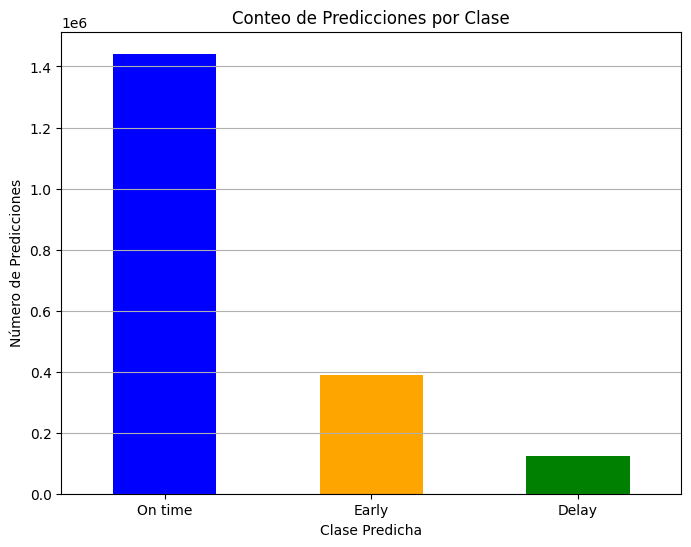

In [32]:
plt.figure(figsize=(8, 6))
prediction_counts.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Conteo de Predicciones por Clase')
plt.xlabel('Clase Predicha')
plt.ylabel('Número de Predicciones')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

**Modelo SVM**

In [ ]:
X_test = df_test3[['CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT',
                    'WHEELS_OFF', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME', 'DISTANCE']]

X_test_scaled = scaler.transform(X_test)
y_pred_test = svm_model.predict(X_test_scaled)
results = pd.DataFrame({
    'Predicted_Class': y_pred_test
})
results.to_csv('predicciones_vuelos_test.csv', index=False)
print("Predicciones guardadas en 'predicciones_vuelos_test.csv'")

Predicciones guardadas en 'predicciones_vuelos_test.csv'


In [ ]:
from google.colab import files
files.download('predicciones_vuelos_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Contar predicciones
prediction_counts = results['Predicted_Class'].value_counts()
print("Conteo de Predicciones:")
print(prediction_counts)

Conteo de Predicciones:
Predicted_Class
On time    1729777
Early       151983
Delay        70617
Name: count, dtype: int64


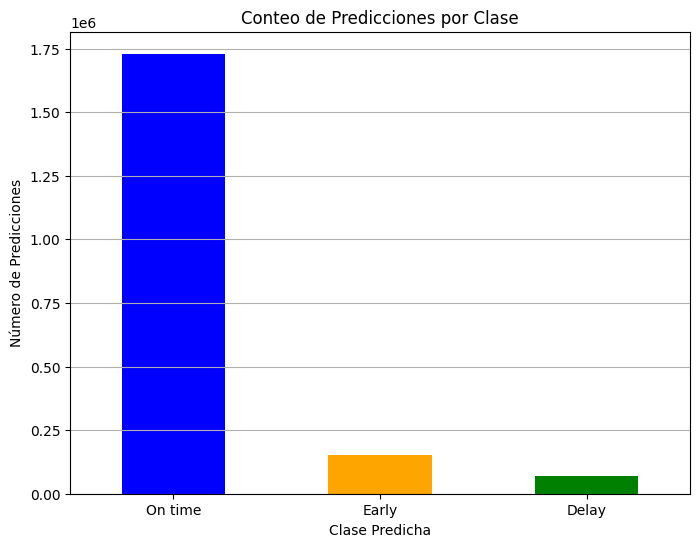

In [ ]:
plt.figure(figsize=(8, 6))
prediction_counts.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Conteo de Predicciones por Clase')
plt.xlabel('Clase Predicha')
plt.ylabel('Número de Predicciones')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

Para los algoritmos de inferencia, se utilizaron los siguientes modelos:
* Regresión Lineal
* Regresión Lasso
* Regresión Ridge

Los modelos de regresión lineal y Ridge parecen ser los más efectivos para predecir la variable dependiente en este conjunto de datos, con un ajuste moderado y errores similares. Ambos también tienen un R² de aproximadamente 0.5977, lo que indica que alrededor del 59.77% de la variabilidad en la variable dependiente se explica por el modelo.

Así mismo, se utilizaron varios algoritmos de clasificación para evaluar su rendimiento en la predicción de las categorías de llegada de vuelos. Los algoritmos aplicados fueron:

* Árbol de decisión
* Árbol de decisión (C4.5)
* Árbol de decisión (ID3)
* CatBoost
* Random Forest
* Regresión logística
* Naive Bayes
* Modelo k-NN (k-Nearest Neighbors)
* SVM (Máquinas de Soporte Vectorial)

Para cada uno de estos modelos, se calcularon métricas clave, incluyendo el F1-score macro, la sensibilidad (recall) y la especificidad, además de sus matrices de confusión. Los modelos que mostraron un mejor desempeño fueron el k-NN, SVM y CatBoost.

Los resultados de k-NN fueron los siguientes:
* Exactitud general: 0.74 (74% de las predicciones fueron correctas).
* Promedio macro: 0.67 en precisión, 0.58 en recall, y 0.61 en F1-score.
* Promedio ponderado: 0.72 en precisión, 0.74 en recall, y 0.72 en F1-score.

El modelo presenta una buena precisión en la clase "Delay" (0.76), pero un recall más bajo (0.56), lo que indica que hay muchos casos de "Delay" que no fueron identificados correctamente.
La clase "Early" muestra una precisión y un recall muy bajos (0.46 y 0.31, respectivamente), sugiriendo que el modelo tiene dificultades significativas para reconocer estos casos.
Por otro lado, el modelo se desempeña bien en la clase "On time", con un recall de 0.88, lo que indica una alta tasa de aciertos.

Por otro lado, en los resultados del modelo de SVM fueron los siguientes:
* Exactitud general: 0.76 (76% de las predicciones fueron correctas).
* Promedio macro: 0.74 en precisión, 0.56 en recall, y 0.59 en F1-score.
* Promedio ponderado: 0.74 en precisión, 0.76 en recall, y 0.72 en F1-score.

El modelo logra una mayor precisión en "Delay" (0.83) en comparación con k-NN, aunque su recall sigue siendo bajo (0.57).
La clase "Early" también presenta un rendimiento deficiente, con un recall alarmantemente bajo de 0.16, lo que implica que solo un pequeño porcentaje de los casos reales se identificaron correctamente.
La clase "On time" tiene un recall muy alto (0.96), lo que sugiere que el modelo es muy eficaz en identificar estos casos.

Y por último el modelo CatBoost muestra un rendimiento general sólido, con una precisión del 78%.

* Delay: Precisión del 72%, recall del 68%, F1-score de 70%.
* Early: Precisión del 59%, recall del 44%, F1-score de 50%.
* On time: Precisión del 82%, recall del 88%, F1-score de 85%.
* El modelo tiene una precisión del 78% en todo el conjunto de datos.

La sensibilidad es alta para "On time" (88%) y moderada para "Delay" (68%), pero baja para "Early" (44%). La especificidad es alta para "Delay" (97%) y "Early" (93%), pero más baja para "On time" (53%).

Se llevó a cabo una prueba utilizando datos proporcionados que son similares a los datos de entrenamiento, con el objetivo de predecir la variable Arr_Delay. Los resultados de la clasificación son los siguientes:

Modelo SVM
Predicciones de Clase:
* On time: 1,729,777 instancias
* Early: 151,983 instancias
* Delay: 70,617 instancias

Modelo Cat boost

* On time: 1,441,787 instancias
* Early: 387,666 instancias
* Delay: 122,924 instancias